In [1]:
# This project uses data from the UCI Machine Learning Database and 
# supervised machine learning algorithms for predictive analysis.

In [2]:
# Goal: Use supervised machine learning to predict 'total_UPDRS' 
# and 'motor_UPDRS'. 

In [3]:
# Import libraries.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
%matplotlib inline
# Suppress any warnings within notebook environment.
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read in data.

In [6]:
data = pd.read_csv('data/parkinsons_updrs.data')

In [7]:
# Take a look at the data.

In [8]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [9]:
# List column names.

In [10]:
list(data)

['subject#',
 'age',
 'sex',
 'test_time',
 'motor_UPDRS',
 'total_UPDRS',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [11]:
# Linear Regression:

In [12]:
# Clean data and prepare for analysis.

In [13]:
data.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [14]:
df = data.drop('subject#', axis = 1)

In [15]:
# Create a list of feature names.

In [16]:
feature_names = list(df.columns)

In [17]:
# Clean and drop NaN observations.

In [18]:
df = df.apply(pd.to_numeric, errors = 'coerce')
df = df.dropna()

In [19]:
# Create two output variables (e.g. total_UPDRS and motor_UPDRS).

In [20]:
y_total = df.total_UPDRS

In [21]:
y_motor = df.motor_UPDRS

In [22]:
df = data.drop('total_UPDRS', axis = 1)
df = data.drop('motor_UPDRS', axis = 1)

In [23]:
# Create a list of features to use for visualization later.

In [24]:
feature_list = list(df)
print(feature_list)

['subject#', 'age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


In [25]:
# Create training and test data.

In [26]:
X_train_motor, X_test_motor, y_train_motor, y_test_motor = \
            train_test_split(df, y_motor, test_size = 0.2)

In [27]:
X_train_total, X_test_total, y_train_total, y_test_total = \
            train_test_split(df, y_total, test_size = 0.2)

In [28]:
##########################################################################
##########################################################################
##########################################################################
##########################################################################
##########################################################################

In [29]:
# (1) Regression Model. 

In [30]:
lm = linear_model.LinearRegression()

In [31]:
total_model = lm.fit(X_train_total, y_train_total)
motor_model = lm.fit(X_train_motor, y_train_motor)

In [32]:
# Make predictions using test data.

In [33]:
total_predictions = lm.predict(X_test_total)
motor_predictions = lm.predict(X_test_motor)

In [34]:
# Plot the models.

Text(0, 0.5, 'Predictions for total_UPDRS')

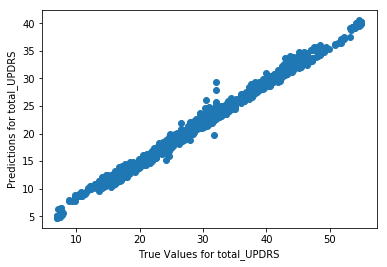

In [35]:
plt.scatter(y_test_total, total_predictions)
plt.xlabel("True Values for total_UPDRS")
plt.ylabel("Predictions for total_UPDRS")

Text(0, 0.5, 'Predictions for motor_UPDRS')

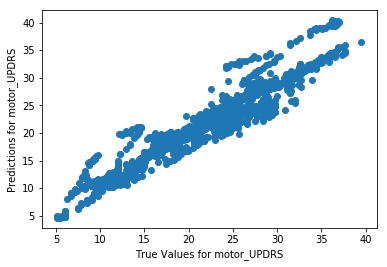

In [36]:
plt.scatter(y_test_motor, motor_predictions)
plt.xlabel("True Values for motor_UPDRS")
plt.ylabel("Predictions for motor_UPDRS")

In [37]:
##########################################################################
##########################################################################
##########################################################################
##########################################################################
##########################################################################

In [38]:
# Random Forest Regression.

In [39]:
# Import libraries from sklearn.

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor()

In [42]:
# Train the model on the training data.

In [43]:
rf.fit(X_train_total, y_train_total)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
# Predict using the test data.

In [45]:
predictions_total = rf.predict(X_test_total)

In [46]:
# Calculate the absolute errors.

In [47]:
errors_total = abs(predictions_total - y_test_total)

In [48]:
# Calculate the mean absolute errors.

In [49]:
mae_total = round(np.mean(errors_total), 2)
print('Mean Absolute Error - total_UPDRS:', round(np.mean(errors_total), 2))

Mean Absolute Error - total_UPDRS: 0.01


In [50]:
# Calculate mean absolute percentage error.

In [51]:
mape_total = 100 *(errors_total/y_test_total)

In [52]:
# Calculate and display accuracy.

In [53]:
accuracy_total = 100 - np.mean(mape_total)

In [54]:
# Now, we can visualize the results of a single tree.

In [55]:
# Import libraries.

In [56]:
from sklearn.tree import export_graphviz
import pydot

In [57]:
# Pull one tree from the forest.

In [58]:
tree = rf.estimators_[3]

In [59]:
# Export image.

In [60]:
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_names, 
                rounded = True, precision = 1)

In [61]:
# Use dot file to create a graph & write to .png.
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')